# Quantitative attributes and probability distributions

So lets move now to quantitative attributes and explore their probability distributions. We will work with *iris* a dataset that contains quantitative predictive attributes. 

In [82]:
# Install and load the latex2exp package, for printing mathematical symbols in R
packageName<-"latex2exp" #install the arules library that provides the discretization function
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}

## Basic statistics for quantititative attributes

In this notebook we will explore the following concepts:
* The density $p(Z)$ of some quantitative random variable and how we should be thinking about it. 
* The concept of conditional density $p(X|Y)$ where $X$ is a quantitative random variable and $Y$ is the target random variable 
* How to visualise the distributions of quantitative random variables, histograms
* How to quantify the predictive power of the quantitative random variables. 

### Introducing the concept of the density p(Z) of some quantitative random variable Z

*Qualitative attributes and probability:* In the case of qualitative attributes we talked about the probability of a given value and the probability distribution of qualitative attribute is given by the probabilities of its different values. For example in titanic we had computed the probability distribution of the class attribute. This is easy because for a given value of the class attribute there is a **set** of instances that take each value. 

```
  crew  first second  third 
   873    332    281    715 
```
and getting the respective probability distribution $P(class)$ makes sense and is straightforward. 
```
    crew     first    second     third 
0.3966379 0.1508405 0.1276692 0.3248523 
```

*Quantitative attributes and probability:* However when we move to quantitative attributes we cannot talk about the probability of a particular value, intuitively this is because there is **no set** of samples that will take that exact value. Consider for example an attribute that measures the height of people (with infinite precision). The probability that you observe an individual with height 1.7385713498576231049678 is zero:

$$P(height = 1.7385713498576231049678) = 0$$

Thus in the case of quantitative attributes we will use a different concept: the **probability density**, which we use to compute the probabilities of intervals. We can compute the probabilities of intervals because in this case we do have sets of instances whose values belong in the interval. If we consider again the height attribute we can compute the probabiilty that height $\in [1.7, 1.8]$, which we typically denote as $P(1.7 \leq height \leq 1.8)$:

$$P(1.7 \leq height \leq 1.8) \neq 0$$

In order to *intuitevely* introduce the concept of the probability density function we will, as a thought exercise, treat our quantitative attribute as a qualitative one. It is straightforward to do that if we **discretise** our quantiative attribute. To discretise a quantitative variable we create intervals and then we map all values that fall in an interval to a single categorical value. 

So in the following commands we will generate an artificial attribute by sampling from some distribution. We will discretize the attribute and then treat it as we did with the quantitative attributes, i.e. get frequencies and then probabilities. 

In [83]:
#for reproducibility, set.seed controls the randomness
set.seed(1)

#we will use a normal distribution with mean given by meanZ and standard deviation given by stdZ
#the rnorm command bellow gives us random samples from that normal distribution
meanZ <- 176
stdZ  <- 10
z <- rnorm(mean=meanZ, sd=stdZ, n=100000) #draw 50000 samples from a normal distribution with mean=176 and standard dev=10
print(z)

     [1] 169.7355 177.8364 167.6437 191.9528 179.2951 167.7953 180.8743 183.3832
     [9] 181.7578 172.9461 191.1178 179.8984 169.7876 153.8530 187.2493 175.5507
    [17] 175.8381 185.4384 184.2122 181.9390 185.1898 183.8214 176.7456 156.1065
    [25] 182.1983 175.4387 174.4420 161.2925 171.2185 180.1794 189.5868 174.9721
    [33] 179.8767 175.4619 162.2294 171.8501 172.0571 175.4069 187.0003 183.6318
    [41] 174.3548 173.4664 182.9696 181.5666 169.1124 168.9250 179.6458 183.6853
    [49] 174.8765 184.8111 179.9811 169.8797 179.4112 164.7064 190.3302 195.8040
    [57] 172.3278 165.5587 181.6972 174.6495 200.0162 175.6076 182.8974 176.2800
    [65] 168.5673 177.8879 157.9504 190.6555 177.5325 197.7261 180.7551 168.9005
    [73] 182.1073 166.6590 163.4637 178.9145 171.5671 176.0111 176.7434 170.1048
    [81] 170.3133 174.6482 187.7809 160.7643 181.9395 179.3295 186.6310 172.9582
    [89] 179.7002 178.6710 170.5748 188.0787 187.6040 183.0021 191.8683 181.5849
    [97] 163.2341 170.2673 1

In [84]:
# install.packages("arules")
#lets discretize z and repeat the analysis that we did with qualitative attributes, i.e. probabilities and bar plots
packageName<-"arules" #install the arules library that provides the discretization function
library(arules)
if (!require(packageName, character.only = TRUE)) {
install.packages(packageName)
library(packageName, character.only = TRUE)
}

#in how many intervals we should divide the possible values of the z random variable
numBins <- 3 
zQualitative <- discretize(z, method = "interval", breaks = numBins) #discretize to numBins=3 equal length bins

print("Unique discretized values:")
print(unique(zQualitative))

print("")

print("Discretized values:")
print(zQualitative)


[1] "Unique discretized values:"
[1] [160,190) [190,219] [131,160)
Levels: [131,160) [160,190) [190,219]
[1] ""
[1] "Discretized values:"
     [1] [160,190) [160,190) [160,190) [190,219] [160,190) [160,190) [160,190)
     [8] [160,190) [160,190) [160,190) [190,219] [160,190) [160,190) [131,160)
    [15] [160,190) [160,190) [160,190) [160,190) [160,190) [160,190) [160,190)
    [22] [160,190) [160,190) [131,160) [160,190) [160,190) [160,190) [160,190)
    [29] [160,190) [160,190) [160,190) [160,190) [160,190) [160,190) [160,190)
    [36] [160,190) [160,190) [160,190) [160,190) [160,190) [160,190) [160,190)
    [43] [160,190) [160,190) [160,190) [160,190) [160,190) [160,190) [160,190)
    [50] [160,190) [160,190) [160,190) [160,190) [160,190) [190,219] [190,219]
    [57] [160,190) [160,190) [160,190) [160,190) [190,219] [160,190) [160,190)
    [64] [160,190) [160,190) [160,190) [131,160) [190,219] [160,190) [190,219]
    [71] [160,190) [160,190) [160,190) [160,190) [160,190) [160,190) [16

[1] "Frequencies"


zQualitative
[131,160) [160,190) [190,219] 
     5705     85652      8643 

[1] "P(zQualitative)"
zQualitative
[131,160) [160,190) [190,219] 
  0.05705   0.85652   0.08643 


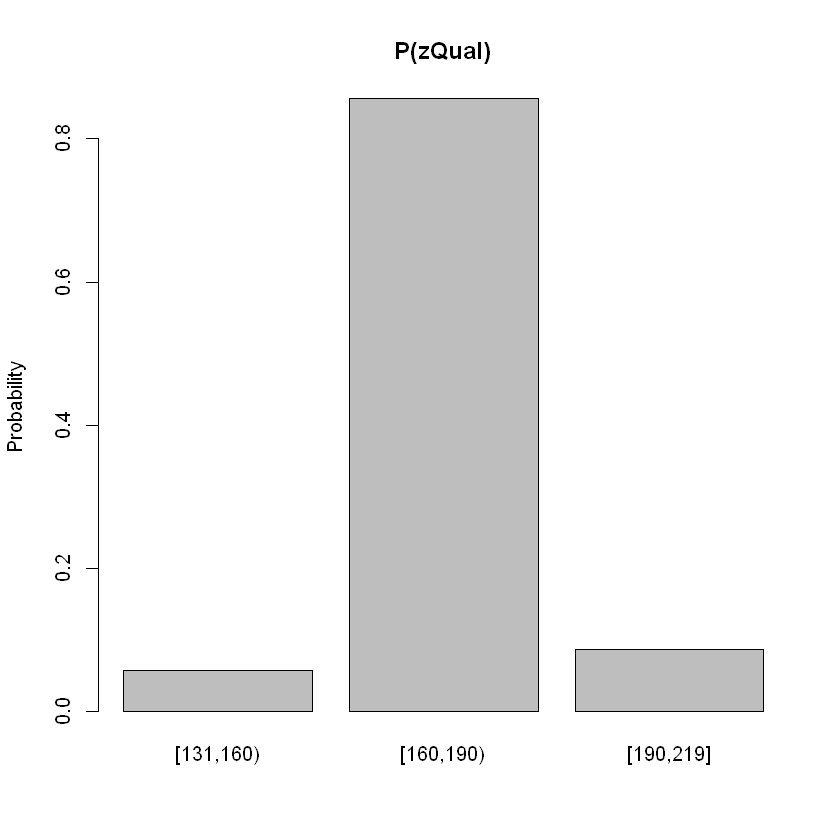

In [85]:
#and now get the probability distribution of our zQualitative
print("Frequencies")
table(zQualitative)

print("P(zQualitative)")
P.zQual<-prop.table(table(zQualitative))
print(P.zQual)

barplot(P.zQual, main="P(zQual)", ylab="Probability")

zQualitative
[131,139) [139,148) [148,157) [157,166) [166,175) [175,184) [184,193) [193,201) 
  0.00012   0.00261   0.02802   0.13022   0.29266   0.32672   0.17041   0.04389 
[201,210) [210,219] 
  0.00505   0.00030 


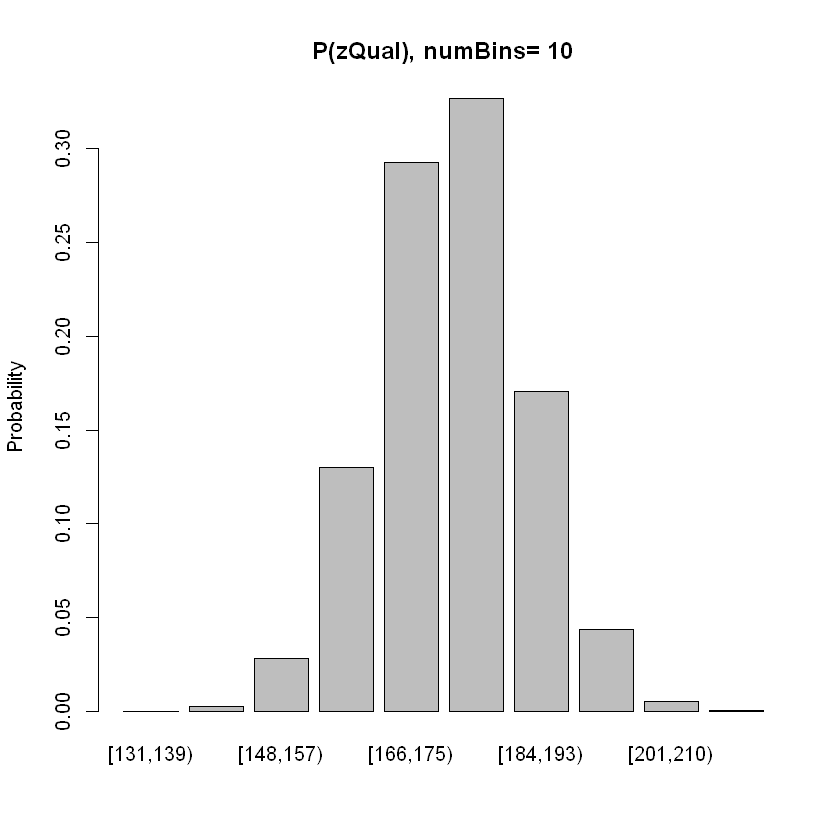

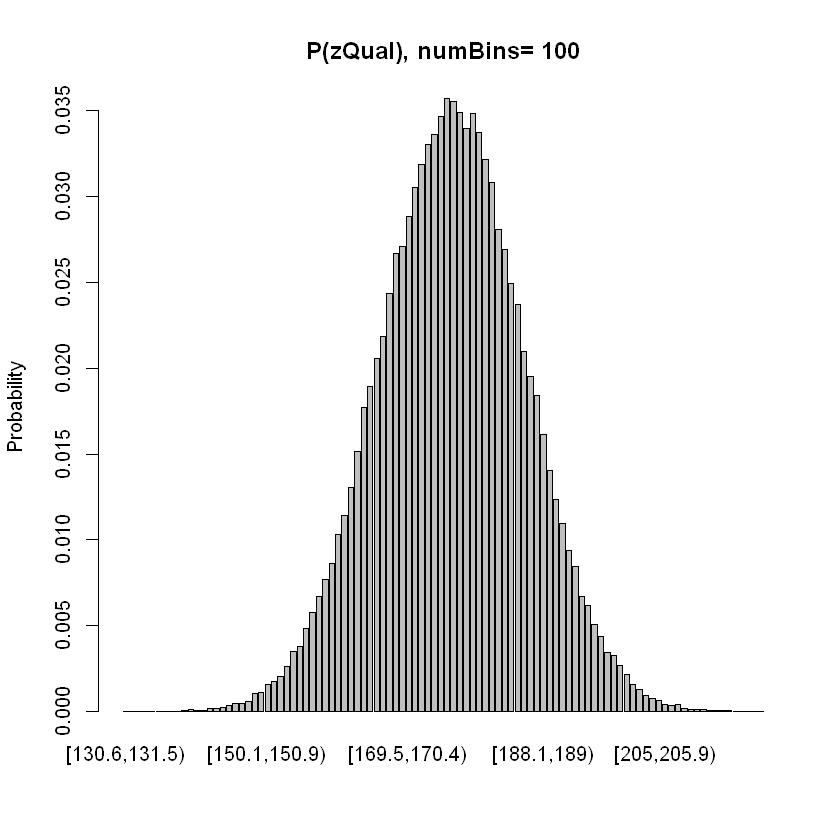

In [86]:
#so lets play a bit now with the number of bins in our discretization 
# and do again the visualisation of the respective distribution 
numBins <- 10 
zQualitative <- discretize(z, method = "interval", breaks = numBins) 
P.zQual<-prop.table(table(zQualitative))
print(P.zQual)
barplot(P.zQual, main=paste("P(zQual), numBins=",numBins), ylab="Probability")

numBins<-100
zQualitative <- discretize(z, method = "interval", breaks = numBins) 
P.zQual<-prop.table(table(zQualitative))
barplot(P.zQual, main=paste("P(zQual), numBins=",numBins), ylab="Probability")



So what we just did above is to increase the number of intervals/bins. Lets us denote the length of an interval/bin by $\delta x$, then the height of the bar that corresponds to the interval $(x, x+\delta x)$ is the probability that we fall in the interval, i.e. $P(x < z < x + \delta x)$. There is nothing new so far. 

Informally: we define the **probability density** $p(z)$ as:
$$P(x < z < x + \delta x) = p(z) \delta x, \text { as } \delta x \rightarrow 0$$
$$ \Rightarrow $$
$$p(z) = \frac{P(x < z < x + \delta x)}{\delta x} , \text { as } \delta x \rightarrow 0$$
i.e. the density $p(z)$ is the value that when multiplied with $\delta x$ will give the probability $P(x < z < x + \delta x)$ (the height of the barplot).

The following code visualy demonstrates how the probability density relates to the actual probability of a bin/interval.


zQualitative
[131,139) [139,148) [148,157) [157,166) [166,175) [175,184) [184,193) [193,201) 
  0.00012   0.00261   0.02802   0.13022   0.29266   0.32672   0.17041   0.04389 
[201,210) [210,219] 
  0.00505   0.00030 


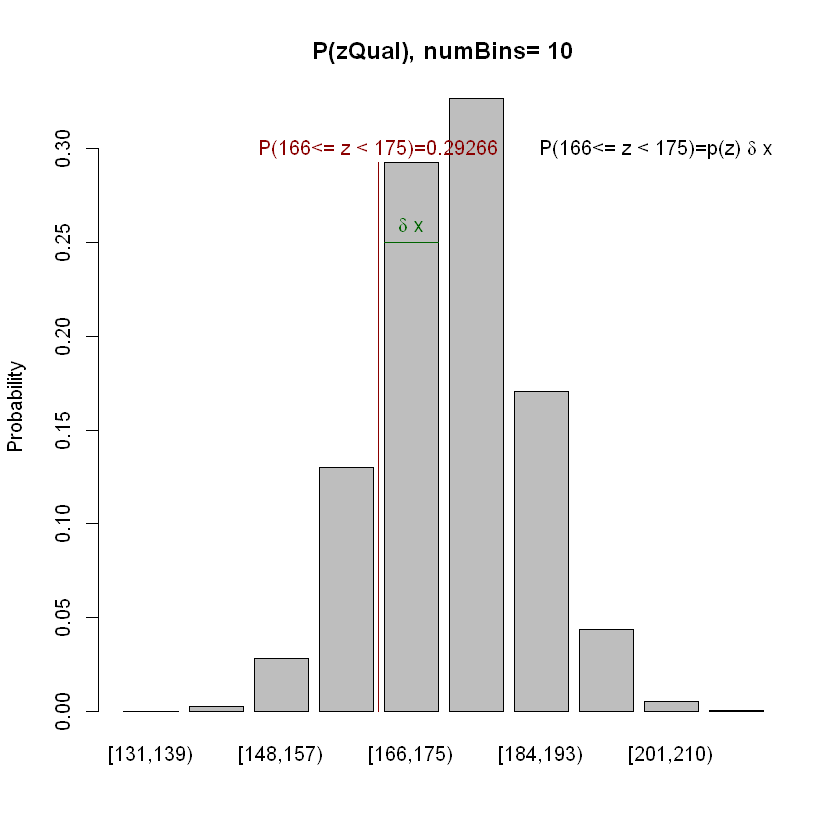

In [87]:
#lets see it with an example
numBins <- 10 
zQualitative <- discretize(z, method = "interval", breaks = numBins) 
P.zQual<-prop.table(table(zQualitative))
print(P.zQual)
barplot(P.zQual, main=paste("P(zQual), numBins=",numBins), ylab="Probability")

#lets look the interval [166, 175)
points(x=c(5,6), y=c(0.25,0.25), type="l",col="darkgreen") #draws a segment indicating dx
text(x = 5.5, y = 0.26, labels = TeX("\\delta x"), col = "darkgreen", cex = 1)

points(x=c(4.9,4.9), y=c(0,0.29266), type="l",col="darkred")         #draws a segment indicating, the
text(x=4.9,y=0.3, labels="P(166<= z < 175)=0.29266",col="darkred")   #height of the [166, 175) bar which
                                                                     #is the empirical probability P(166<= z < 175)

#displays the relationship between the density and the probability
text(x=10,y=0.3, labels=TeX("P(166<= z < 175)=p(z) \\delta x") )


So lets draw the actual density function and see how it compares to the empirical probability distribution that we have computed on the discretised version of our random variable.

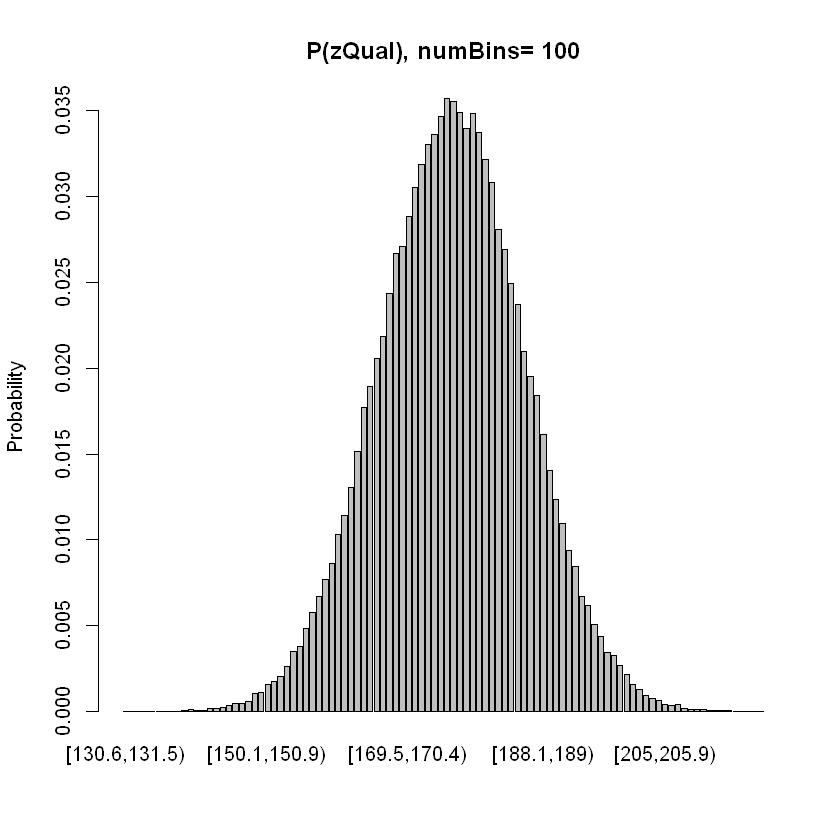

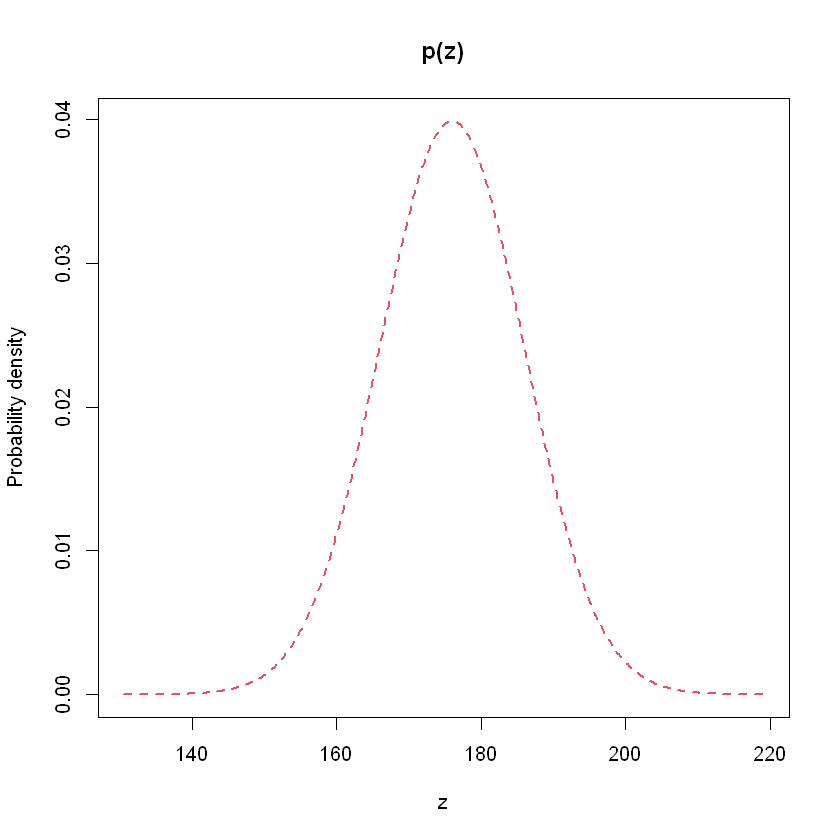

In [88]:
numBins<-100
#As before we discretize and we compute, and plot, probabilities for the discrete values
zQualitative <- discretize(z, method = "interval", breaks = numBins) 
P.zQual<-prop.table(table(zQualitative))
barplot(P.zQual, main=paste("P(zQual), numBins=",numBins), ylab="Probability")


#Now we will directly draw the density of a normal distribution with mean=meanZ and standard deviation=stdZ
#dnorm is the density function of a normal distribution with mean=meanZ and sd=stdZ
zVals <- seq(from=min(z), to=max(z), length.out=500)    #create a sequence of z values for which we will compute the density
zDensity <- sapply(zVals, dnorm, mean=meanZ, sd=stdZ)   #compute the density for the z values
plot(zVals, zDensity, main="p(z)", xlab="z", ylab="Probability density", col=2, lty=2,lwd=2,type="l")
#the curve command bellow does exactly the same thing as the three previous commands, try it. It draws the 
#curve of the function dnorm in the interval from... to...
#curve(dnorm(x,mean=meanZ, sd=stdZ), from=min(z), to=max(z), col=2, lty=2,lwd=2, ylab="Density", main="p(z)", xlab="z")


As we can see in the two figures above the empirical probability distribution of our discretised variable and the probability density function of our original variable have practically the same shape. 

The actual relation between the probability that our random variable is in the interval $(a,b)$ and the probability density function is given by the integral:
$$ P(a < z < b) = \int_a^b p(z) dz $$
note also that 
$$ P(-\infty < z < +\infty) = \int_{-\infty}^{+\infty} p(z) dz = 1.0 $$
the probability of all possible values is, as expected, equal to 1.0.

One of the most important distributions of quantitative random variable is the **Normal distribution**. Actually in the examples above we used a normal distribution to generate the data. Given a random variable $z$ that follows the normal distribution we denote that by:
$$z \sim N(\mu, \sigma^2)$$
where: 
* $\mu$ is the mean of our random variable, 
* $\sigma$ is the standard deviation, and
* $\sigma^2$ is its variance.
The probability density function of the normal distribution is given by:
$$p(z) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{(z - \mu)^2}{2\sigma^2}}$$

The following code piece plots the probability density function of the $z \sim N(0, 1)$ normal distribution.

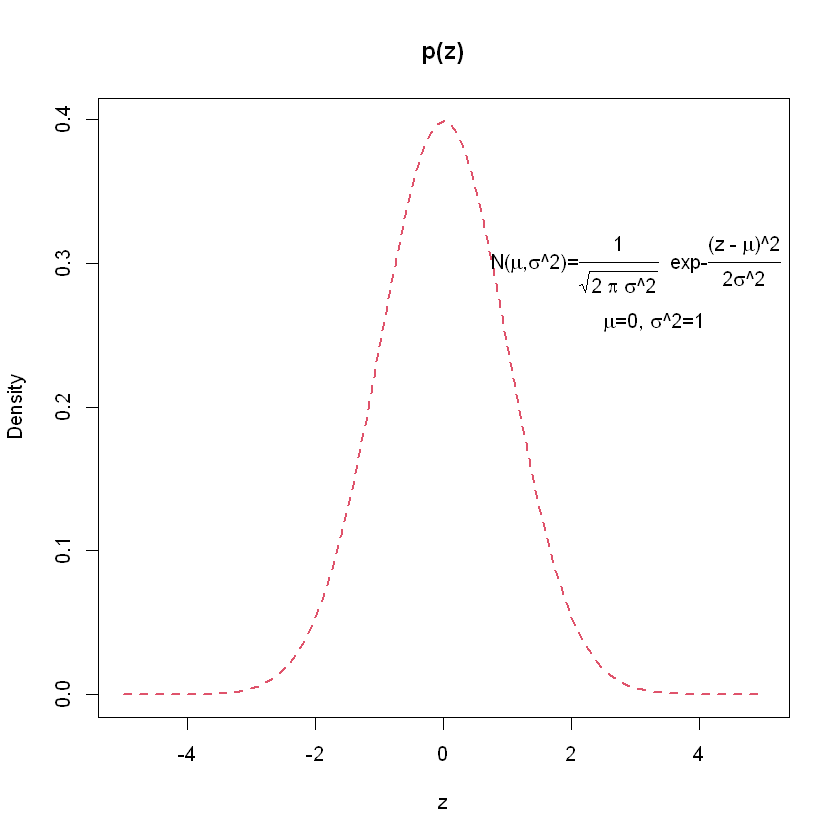

In [89]:
#dnorm is the density function of a normal distribution with mean=0 and sd=1
#curve draws the dnorm function from=... to...
curve(dnorm(x,mean=0, sd=1), from=-5, to=5, col=2, lty=2,lwd=2, ylab="Density", main="p(z)", xlab="z")

text(x=3,y=0.3, labels=TeX("N(\\mu,\\sigma^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma^2}} \\exp{-\\frac{(z - \\mu)^2}{2\\sigma^2}}") )
text(x=3.3,y=0.26, labels=TeX("\\mu=0, \\sigma^2=1") )


So lets visualise in the above in the $N(0,1)$ normal distribution 
* the mean, $\mu$, and
* the interval $(\mu-\sigma, \mu+\sigma)$
with the help of the following code.

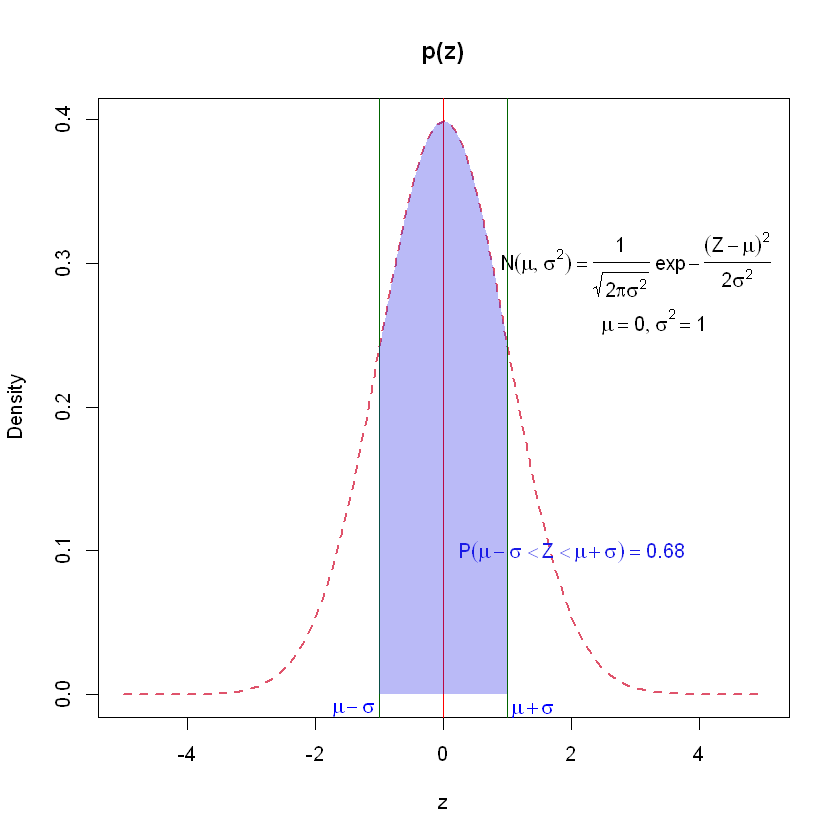

In [90]:
meanZ <- 0
stdZ <- 1
#the following command draws the density function of the normal distribution N(0,1)
#dnorm is the density function of a normal distribution with mean=0 and sd=1
#curve draws the dnorm function from=... to...
curve(dnorm(x,mean=meanZ, sd=stdZ), 
      from=-5, to=5, 
      col=2, lty=2,
      lwd=2, 
      ylab="Density", main="p(z)", xlab="z")

text(x=3,y=0.3, labels=TeX("$N(\\mu,\\sigma^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma^2}} \\exp{-\\frac{(Z - \\mu)^2}{2\\sigma^2}}$") )
text(x=3.3,y=0.26, labels=TeX("$\\mu=0, \\sigma^2=1$") )

#
abline(v=meanZ, col="red") 

#######################################################
#draw the one standard deviation region around the mean
#this region theoretically contains 34.1% of the data 
#on each side around the mean
points(x=c(meanZ-stdZ,meanZ+stdZ), y=c(5,5), type="l",col="darkgreen") #draws a line centered at the mean
                                                                                 #with length standard deviation
text(x = meanZ-1.4*stdZ, y = -0.01, labels = TeX("$\\mu-\\sigma$"), col = "blue", cex = 1) #add \mu - \sigma text
text(x = meanZ+1.4*stdZ, y = -0.01, labels = TeX("$\\mu+\\sigma$"), col = "blue", cex = 1) #add \mu + \sigma text
abline(v=meanZ-stdZ, col="darkgreen") #vertical line at \mu - \sigma
abline(v=meanZ+stdZ, col="darkgreen") #vertical line at \mu + \sigma


text(x = meanZ+2, y = 0.1, labels = TeX("$P(\\mu - \\sigma < Z < \\mu+\\sigma) = 0.68$"), col = rgb(0.1, 0.1, 0.9, 1), cex = 1)

# Shade the area within one standard deviation
x_shade <- seq(meanZ - stdZ, meanZ + stdZ, length.out = 100) #get a sequence of numbers between m - std, m + std
y_shade <- dnorm(x_shade, mean = meanZ, sd = stdZ)           #evaluate the p(z) for each of these numbers
polygon(c(meanZ - stdZ, x_shade, meanZ + stdZ),              #draw a surface covering the appropriate area
        c(0, y_shade, 0), col = rgb(0.1, 0.1, 0.9, 0.3), border = NA)
#######################################################

In the above graph the surface of the shaded area is the $P(\mu - \sigma < Z < \mu+\sigma)$ probability. As we show before this probability is given by the integral:
$$P(\mu - \sigma < Z < \mu+\sigma) = \int_{\mu - \sigma}^{\mu+\sigma} p(z) dz =  \int_{\mu - \sigma}^{\mu+\sigma} N(\mu, \sigma^2) \simeq 0.68$$

Overall:
* you can think of the probability density function as a proxy of the probability distribution, and sometimes we are going to use it instead of the probability (Naive bayes)
* the density function gives you the probability of any interval by integrating it over that interval

**Exercise**: 
 * create a sample of 10000 instances from a normally distributed variable with mean=10 and standard deviation=3
 * from the sample create the respective qualitative variable, use 100 bins, and draw the distribution of the qualitative variable
 * draw the probability density function of your normal distribution and compare that to the distribution that you draw in the previous step

[1] "Unique discretized values:"
 [1] [8.06,8.33)     [10.5,10.7)     [7.27,7.53)     [14.7,15)      
 [5] [11,11.3)       [7.53,7.8)      [11.3,11.5)     [12,12.3)      
 [9] [11.5,11.8)     [8.86,9.13)     [14.4,14.7)     [3.28,3.55)    
[13] [13.1,13.4)     [9.66,9.92)     [9.92,10.2)     [12.6,12.8)    
[17] [12.3,12.6)     [10.2,10.5)     [3.81,4.08)     [11.8,12)      
[21] [9.39,9.66)     [5.41,5.67)     [8.33,8.59)     [13.9,14.2)    
[25] [5.67,5.94)     [8.59,8.86)     [9.13,9.39)     [7.8,8.06)     
[29] [6.47,6.73)     [14.2,14.4)     [15.8,16)       [6.73,7)       
[33] [17.1,17.4)     [4.34,4.61)     [16.3,16.6)     [7,7.27)       
[37] [6.2,6.47)      [10.7,11)       [13.4,13.6)     [5.94,6.2)     
[41] [15.2,15.5)     [15,15.2)       [5.14,5.41)     [4.08,4.34)    
[45] [4.88,5.14)     [16,16.3)       [12.8,13.1)     [15.5,15.8)    
[49] [16.6,16.8)     [16.8,17.1)     [3.02,3.28)     [17.4,17.6)    
[53] [4.61,4.88)     [1.16,1.42)     [2.75,3.02)     [17.9,18.2)    
[

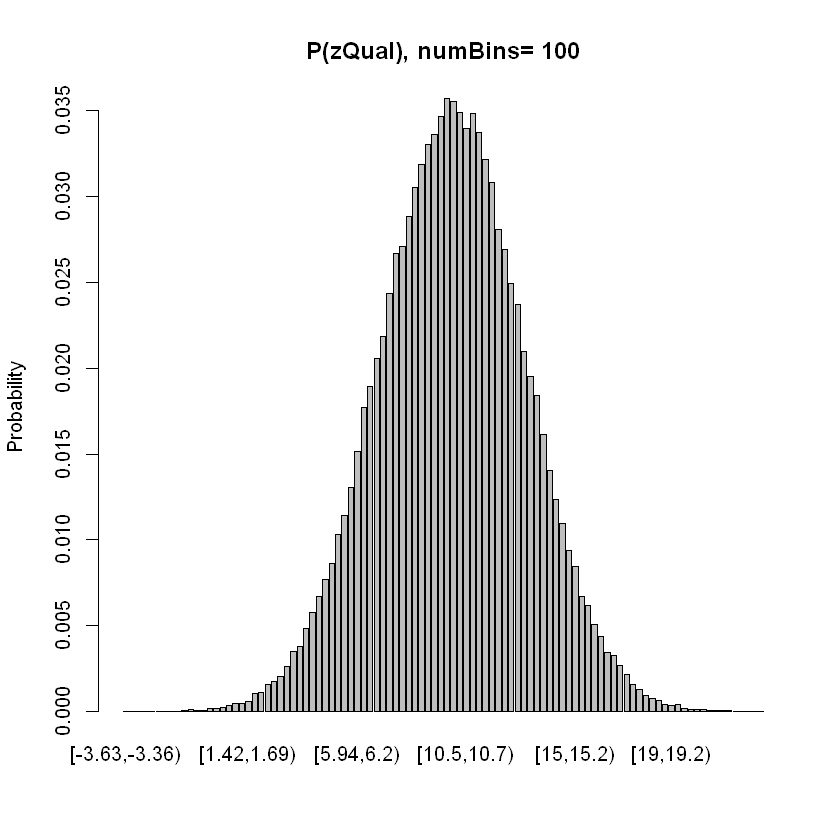

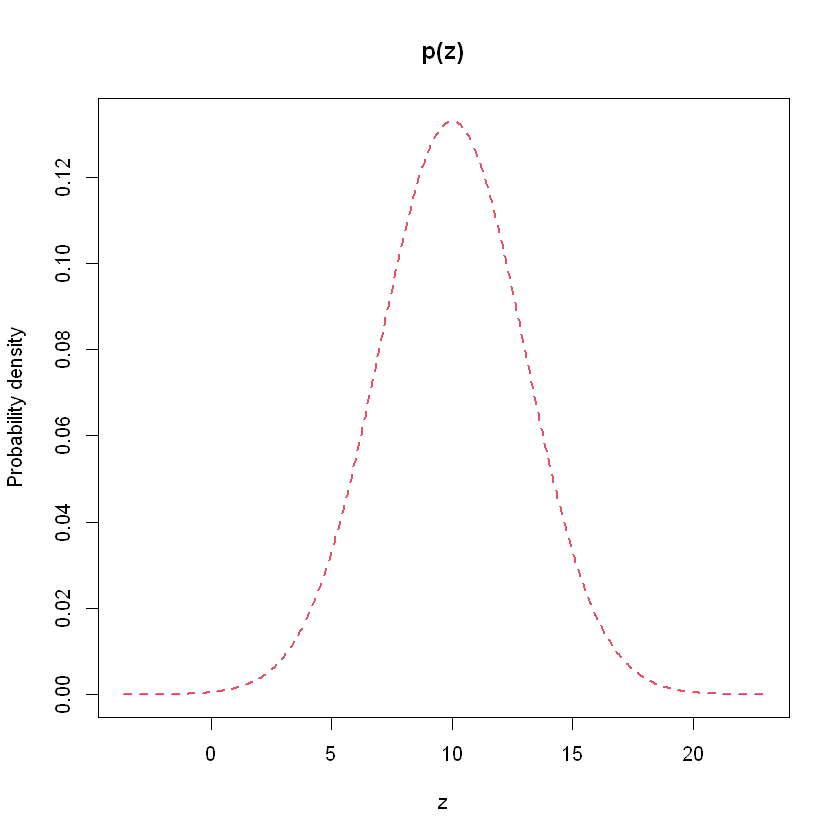

In [91]:
#for reproducibility, set.seed controls the randomness
set.seed(1)

#we will use a normal distribution with mean given by meanZ and standard deviation given by stdZ
#the rnorm command bellow gives us random samples from that normal distribution
meanZ <- 10
stdZ  <- 3
z <- rnorm(mean=meanZ, sd=stdZ, n=100000) #draw 100000 samples from a normal distribution with mean=10 and standard dev=3

#in how many intervals we should divide the possible values of the z random variable
numBins <- 100
zQualitative <- discretize(z, method = "interval", breaks = numBins) #discretize to numBins=3 equal length bins

print("Unique discretized values:")
print(unique(zQualitative))

print("")

print("Discretized values:")
print(zQualitative)

P.zQual<-prop.table(table(zQualitative))
print(P.zQual)
barplot(P.zQual, main=paste("P(zQual), numBins=",numBins), ylab="Probability")


#Now we will directly draw the density of a normal distribution with mean=meanZ and standard deviation=stdZ
#dnorm is the density function of a normal distribution with mean=meanZ and sd=stdZ
zVals <- seq(from=min(z), to=max(z), length.out=500)    #create a sequence of z values for which we will compute the density
zDensity <- sapply(zVals, dnorm, mean=meanZ, sd=stdZ)   #compute the density for the z values
plot(zVals, zDensity, main="p(z)", xlab="z", ylab="Probability density", col=2, lty=2,lwd=2,type="l")
#the curve command bellow does exactly the same thing as the three previous commands, try it. It draws the 
#curve of the function dnorm in the interval from... to...
#curve(dnorm(x,mean=meanZ, sd=stdZ), from=min(z), to=max(z), col=2, lty=2,lwd=2, ylab="Density", main="p(z)", xlab="z")


**End of the intoduction of the main concepts for probabilities and statistics for quantitative attributes, with a focus on the density function.**

## Working with real data

What follows is the type of analysis we expect you to do in the quantitiative attributes of your project. The main goal of this analysis is to understand what are the quantitative attributes that mostly help use decide the value of the target attribute.

So lets now work with the Iris dataset and analyse the distribution of the different attributes and their relation to the target variable. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="setosa" width="100" height="80">

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg
" alt="versicolor" width="100" height="80">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1280px-Iris_virginica.jpg
" alt="virginica" width="100" height="80">


In [92]:
setwd('../datasets')
myData <- read.table(file="iris.csv", header=T, sep=",")
summary(myData)
names(myData)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
    type.          
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

[1] "sepal_length" "sepal_width"  "petal_length" "petal_width"  "type."

To visualise the distributions of quantitative attributes we will use histograms. These basically do the work that we manually did above, i.e. define intervals, discretise, and create the barplots, with a single command. 

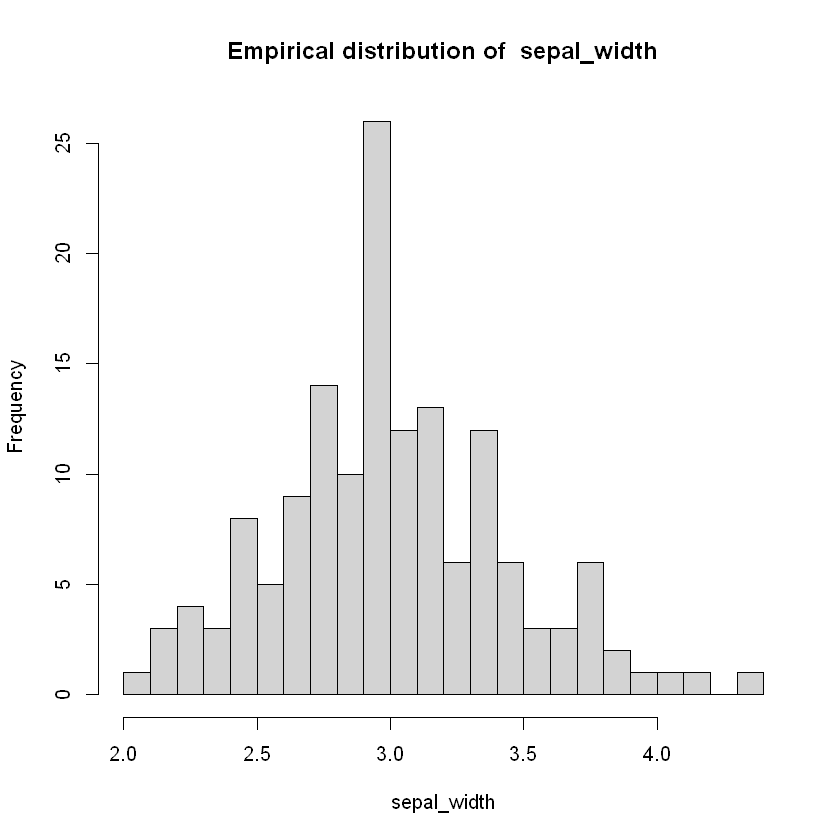

In [93]:
#lets visualise the distibution of the sepal_width (second attribute) with the help of a histogram
#note that the x-axis gives the counts/frequency
index <-2
hist(myData[,index], 
     main=paste("Empirical distribution of ", names(myData)[index]), #the header of the graph
     xlab=names(myData)[index], #the label of the x-axis
     breaks=20) #how many bins our histogram will have, each bin is an interval of values of our quantitative attribute

Given a quantitive random variable X and a random sample $\mathbf x=\{x_1, \dots, x_n\}$ of it the **empirical mean** is given by:
$$\mu_X = \frac{\sum_{i=1}^n x_i}{n} $$
Lets compute the mean of our attribute and then visualise it over the histogram using a vertical line


In [94]:
avg<-mean(myData[,index])

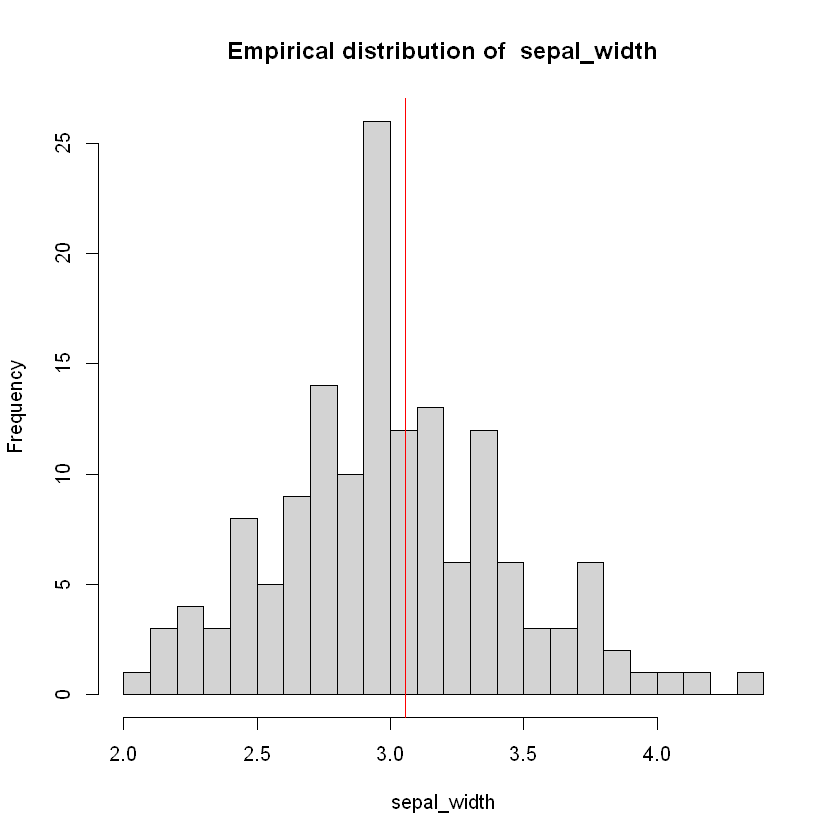

In [95]:
#visualise the distribution and show the mean
hist(myData[,index], 
     main=paste("Empirical distribution of ", names(myData)[index]), #the header of the graph
     xlab=names(myData)[index],
     breaks=20) #how many bins are histogram will have
abline(v=mean(myData[,index]), col="red") #draw a vertical line at the mean

Lets look at the empirical variance, which is given by:
$$\sigma_X^2=\sum_{i=1}^{n} \frac{(x_i - \mu_X)^2}{n}$$
and the standard deviation (which is just the $\sqrt{ \text{ of the variance}}$:
$$\sigma_X = \sqrt{\sum_{i=1}^{n} \frac{(x_i - \mu_X)^2}{n}}$$
Lets think for a moment what is the *meaning* of the variance?

lets compute the variance of our attribute and its standard deviation and then draw the standard over our histogram, as an horizontal line segment

In [96]:
var(myData[,index])

[1] 0.188004

In [97]:
standardDev<-sqrt(var(myData[,index]))

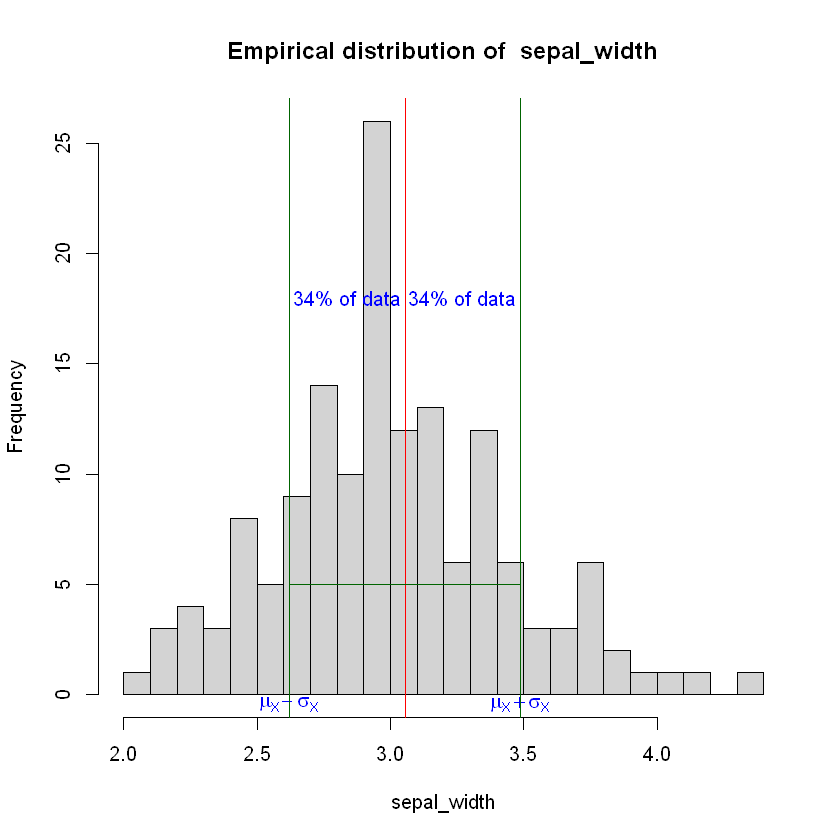

In [98]:
#we will draw the standard deviation as a segment centered at the mean with length 2 x standardDeviation
#visualise the distribution and show the mean
hist(myData[,index], 
     main=paste("Empirical distribution of ", names(myData)[index]), #the header of the graph
     xlab=names(myData)[index],
     breaks=20) #how many bins are histogram will have
abline(v=mean(myData[,index]), col="red") #the mean

#######################################################
#draw the one standard deviation region around the mean
#This region theoretically contains 68% of the data 
#on each side around the mean, if the attribute is normally distributed
points(x=c(avg-standardDev,avg+standardDev), y=c(5,5), type="l",col="darkgreen") #draws a line centered at the mean
                                                                                 #with length standard deviation
text(x = avg-standardDev, y = -0.4, labels = TeX("$\\mu_X-\\sigma_X$"), col = "blue", cex = 1) #add \mu - \sigma text
text(x = avg+standardDev, y = -0.4, labels = TeX("$\\mu_X+\\sigma_X$"), col = "blue", cex = 1) #add \mu + \sigma text
abline(v=avg-standardDev, col="darkgreen") #vertical line at \mu - \sigma
abline(v=avg+standardDev, col="darkgreen") #vertical line at \mu + \sigma

text(x = avg-0.5*standardDev, y = 18, labels = "34% of data", col = "blue", cex = 1)
text(x = avg+0.5*standardDev, y = 18, labels = "34% of data", col = "blue", cex = 1)
#######################################################

Interpretation of standard deviation and variance: The standard deviation is the average distance of a random sample from the mean, the variance is the average squared distance. The interval $$(\mu_x - \sigma_x, \mu_x - \sigma_x)$$ 
contains (theoretically) 68% of the data *if our attribute is normally distributed*. 

Lets see now how we can compute the mean and the variance for a number of attributes with a signle command.

In [99]:
#the mean of all the attributes
colMeans(myData[,c(1:4)])

sepal_length  sepal_width petal_length  petal_width 
    5.843333     3.054000     3.758667     1.198667

In [100]:
#variance 
var(myData[,c(1:4)])

sepal_length sepal_width petal_length petal_width
sepal_length  0.68569351  -0.03926846  1.2736823    0.5169038 
sepal_width  -0.03926846   0.18800403 -0.3217128   -0.1179812 
petal_length  1.27368233  -0.32171275  3.1131794    1.2963875 
petal_width   0.51690380  -0.11798121  1.2963875    0.5824143

See how computing the variance on a set of attributes returns us a matrix and not a vector. This matrix is called the variance-covariance matrix, its diagonal is the variance of the attributes. 

In [101]:
#since the variance is in the diagonal I just need to retrieve the 
#elements in the diagonal
diag(var(myData[,c(1:4)]))

sepal_length  sepal_width petal_length  petal_width 
   0.6856935    0.1880040    3.1131794    0.5824143

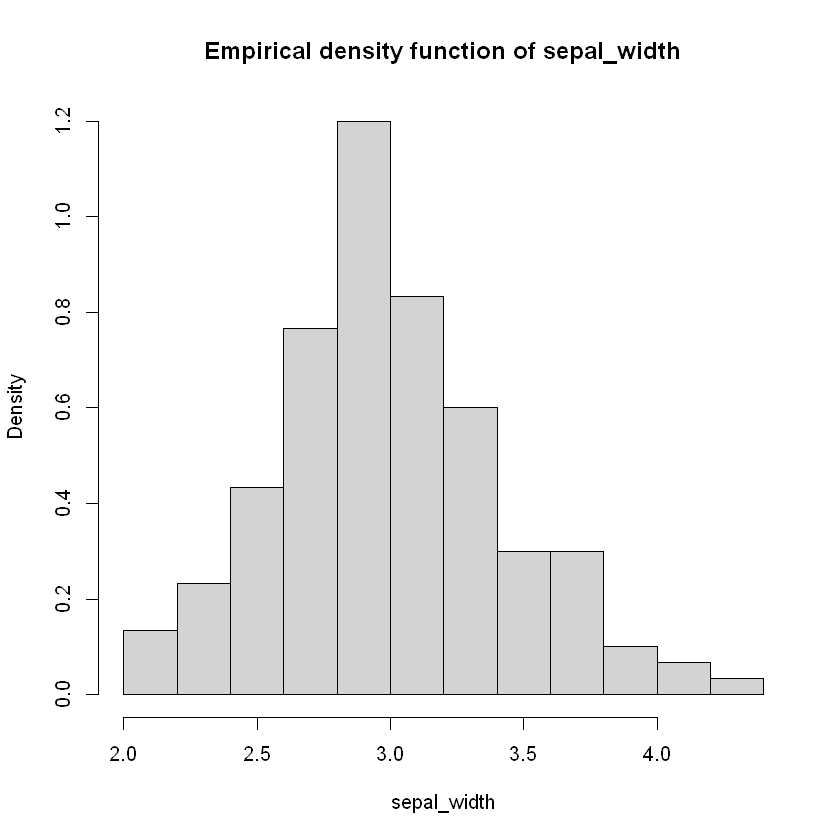

In [102]:
#If instead of the frequency information we want to draw the empirical density function we 
#simply call the hist function with freq=FALSE
hist(myData[,index],main=paste("Empirical density function of", names(myData)[index]), #the header of the graph
      xlab=names(myData)[index],freq=FALSE)

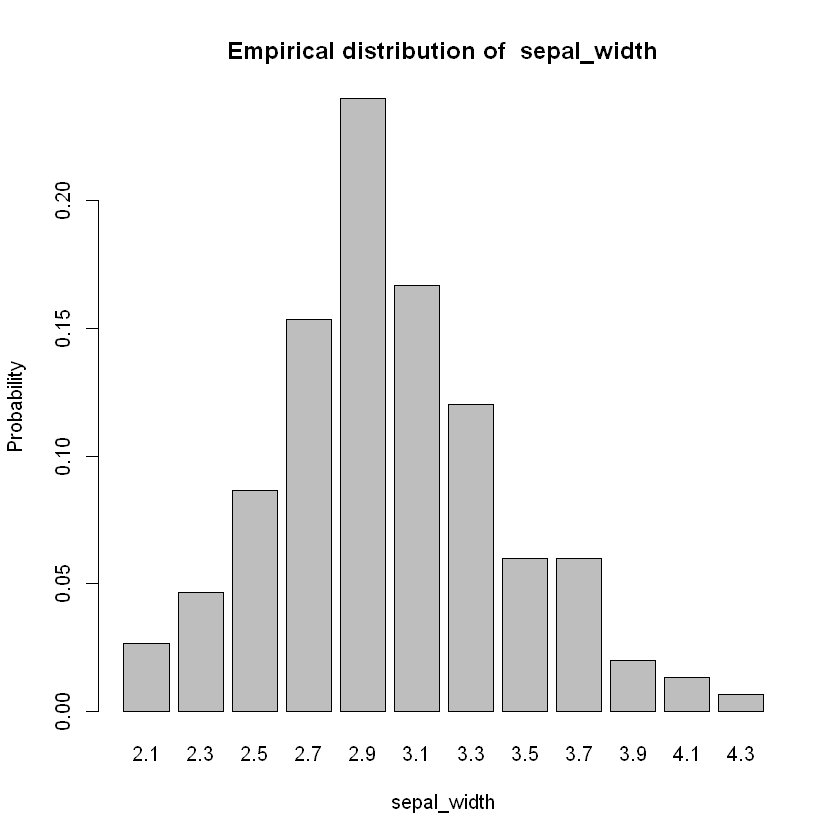

In [103]:
#If we want to get the probabities we can go as follows:
#We will use a barplot in which the bars will come from the histogram bins
# Create a histogram object
histData <- hist(myData[,index], plot = FALSE)

# Calculate probabilities
probabilities <- histData$counts / sum(histData$counts)

# Plot the histogram with probabilities
#barplot(probabilities)
#plot(histData$mids, probabilities, type = "h", lwd = 2, col = "skyblue",
#main = "Histogram with Probabilities", xlab = "Value", ylab = "Probability")
# Plot the histogram with probabilities using barplot
barplot(probabilities, names.arg = histData$mids,
      main=paste("Empirical distribution of ", names(myData)[index]), #the header of the graph
      xlab=names(myData)[index],
      ylab = "Probability")

**Exercise** 
* visualise the density of the petal width attribute (use histograms)
* visualise the density of a normal distribution with mean and standard deviation of that of the petal width (use curve and dnorm)
* does it follow a normal distribution?
* check for the other attributes also

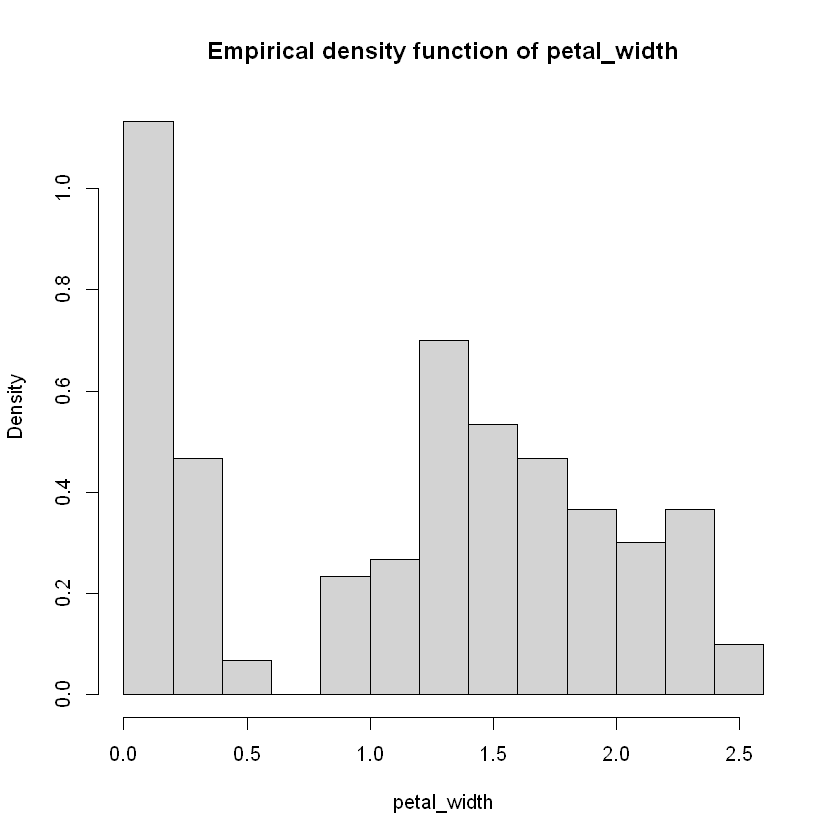

In [105]:
#solution petal width
index <- 4
hist(myData[,index],main=paste("Empirical density function of", names(myData)[index]), #the header of the graph
     xlab=names(myData)[index],freq=FALSE)

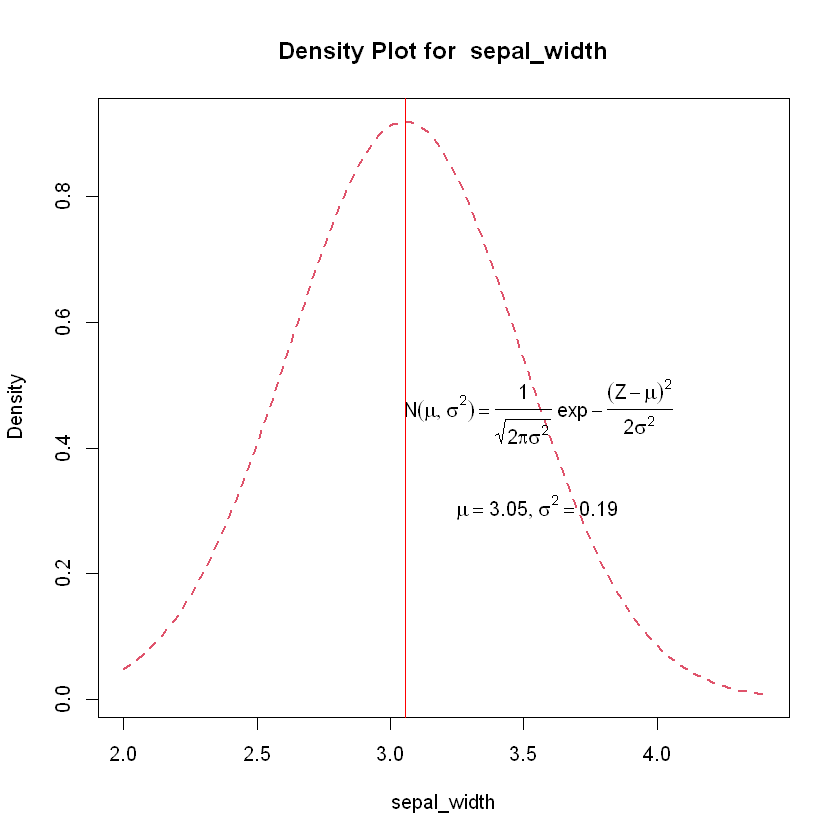

In [121]:
#solution sepal width
index <- 2
meanZ <- mean(myData[,index])
stdZ <- sqrt(var(myData[,index]))

# Set up the range for the x-axis to cover most of the Petal.Width values
x_range <- seq(min(myData[,index]), max(myData[,index]), length.out = 100)

# Plot the normal distribution using the calculated mean and standard deviation
curve(dnorm(x, mean = meanZ, sd = stdZ),
        from = min(x_range), to = max(x_range),  # Use the correct range for plotting
        col = 2, lty = 2,
        lwd = 2,
        ylab = "Density", main = paste("Density Plot for ", names(myData)[index]), xlab = names(myData)[index])

text(x=meanZ + 0.5,y= dnorm(meanZ, mean = meanZ, sd = stdZ) / 2, labels=TeX("$N(\\mu,\\sigma^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma^2}} \\exp{-\\frac{(Z - \\mu)^2}{2\\sigma^2}}$") )
text(x=meanZ + 0.5,y= dnorm(meanZ, mean = meanZ, sd = stdZ) / 3, labels=TeX(sprintf("$\\mu=%.2f, \\sigma^2=%.2f$", meanZ, stdZ^2)))

# Add a vertical line to indicate the mean
abline(v = meanZ, col = "red")

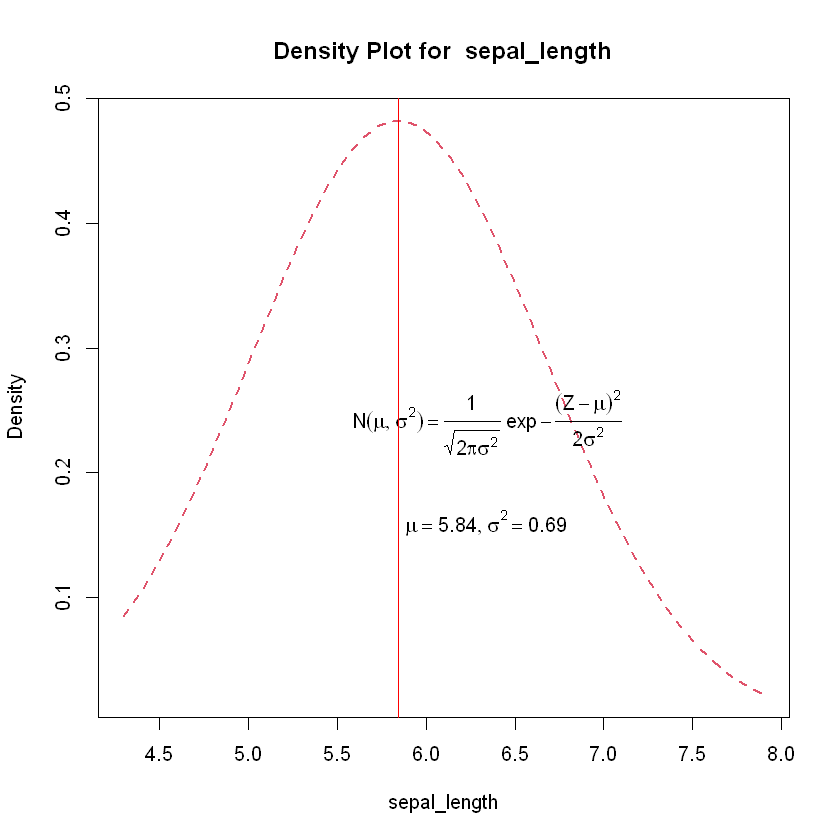

In [122]:
#solution sepal length
index <- 1
meanZ <- mean(myData[,index])
stdZ <- sqrt(var(myData[,index]))

# Set up the range for the x-axis to cover most of the Petal.Width values
x_range <- seq(min(myData[,index]), max(myData[,index]), length.out = 100)

# Plot the normal distribution using the calculated mean and standard deviation
curve(dnorm(x, mean = meanZ, sd = stdZ),
      from = min(x_range), to = max(x_range),  # Use the correct range for plotting
      col = 2, lty = 2,
      lwd = 2,
      ylab = "Density", main = paste("Density Plot for ", names(myData)[index]), xlab = names(myData)[index])

text(x=meanZ + 0.5,y= dnorm(meanZ, mean = meanZ, sd = stdZ) / 2, labels=TeX("$N(\\mu,\\sigma^2)=\\frac{1}{\\sqrt{2 \\pi \\sigma^2}} \\exp{-\\frac{(Z - \\mu)^2}{2\\sigma^2}}$") )
text(x=meanZ + 0.5,y= dnorm(meanZ, mean = meanZ, sd = stdZ) / 3, labels=TeX(sprintf("$\\mu=%.2f, \\sigma^2=%.2f$", meanZ, stdZ^2)))

# Add a vertical line to indicate the mean
abline(v = meanZ, col = "red")

## Conditional distributions $P(X|Y)$

Of particular interest when we are working with quantitative attributes in classification problems is the conditional distribution of the predictive attributes **given** the target attribute. We will use these conditional distributions (as in the case of the qualitative attributes) in order to try to understand how the predictive attributes relate to the target attribute.

*Attention*: with the qualitative attributes we looked at the $P(Y|X)$ instead of the $P(X|Y)$ that we look at here. 

So we will now try to visualise the conditional distribution of two attributes given the class, and explore in a visual manner which one of the two helps us best distinguish between the classes. So lets focus at two classes only (even though iris has three): **setosa** and **virginica**

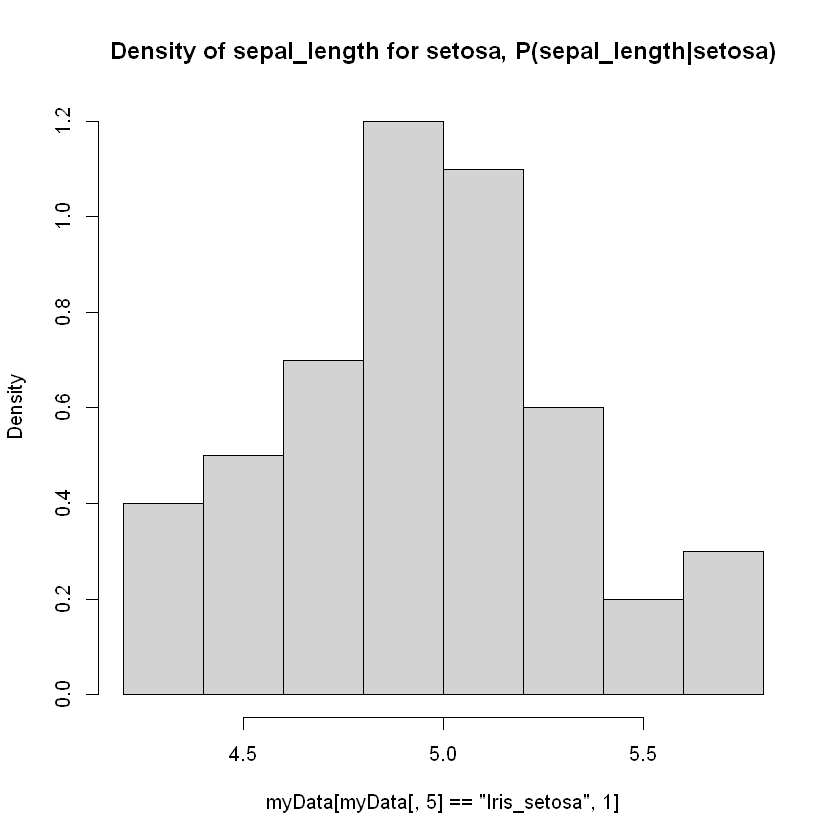

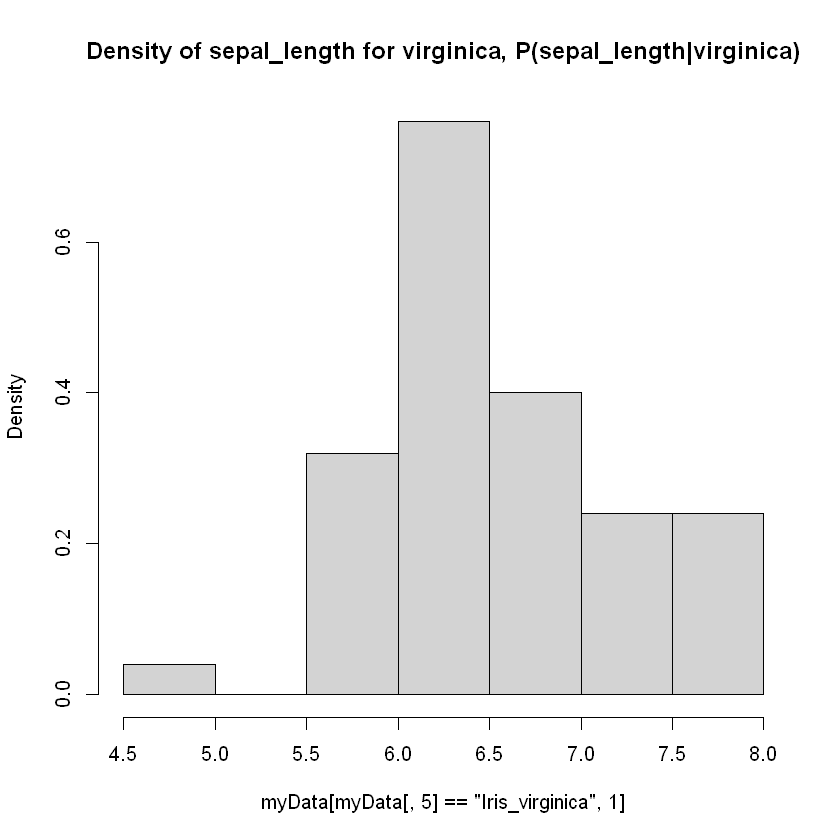

In [28]:
#first attribute: sepal length
#visualise the two distributions, but we have a bit of a problem with the x-axis which does not
#have exactly the same bins in the two graphs.
hist(myData[ myData[,5]=="Iris_setosa"  ,    1], main="Density of sepal_length for setosa, P(sepal_length|setosa)",freq=FALSE)
hist(myData[ myData[,5]=="Iris_virginica"  ,    1], main="Density of sepal_length for virginica, P(sepal_length|virginica)",freq=FALSE)

The problem with the above visualisations is that the bins are not the same for the two classes, and we cannot compare the two histograms in a meaningful manner. In order to correct for that we will fix ourselves the bins that we will use. We will do so by defining the argument *breaks* of the hist command. 

In [123]:
# P(sepal_length|setosa) & P(sepal_length|virginica)
#To force the same bins we are going to use the breaks argument in hist which controls the separation. 
minX <- min(myData[,1])
maxX <- max(myData[,1])

breaks = seq(from = minX, to = maxX, length.out=20)
print(breaks)

 [1] 4.300000 4.489474 4.678947 4.868421 5.057895 5.247368 5.436842 5.626316
 [9] 5.815789 6.005263 6.194737 6.384211 6.573684 6.763158 6.952632 7.142105
[17] 7.331579 7.521053 7.710526 7.900000


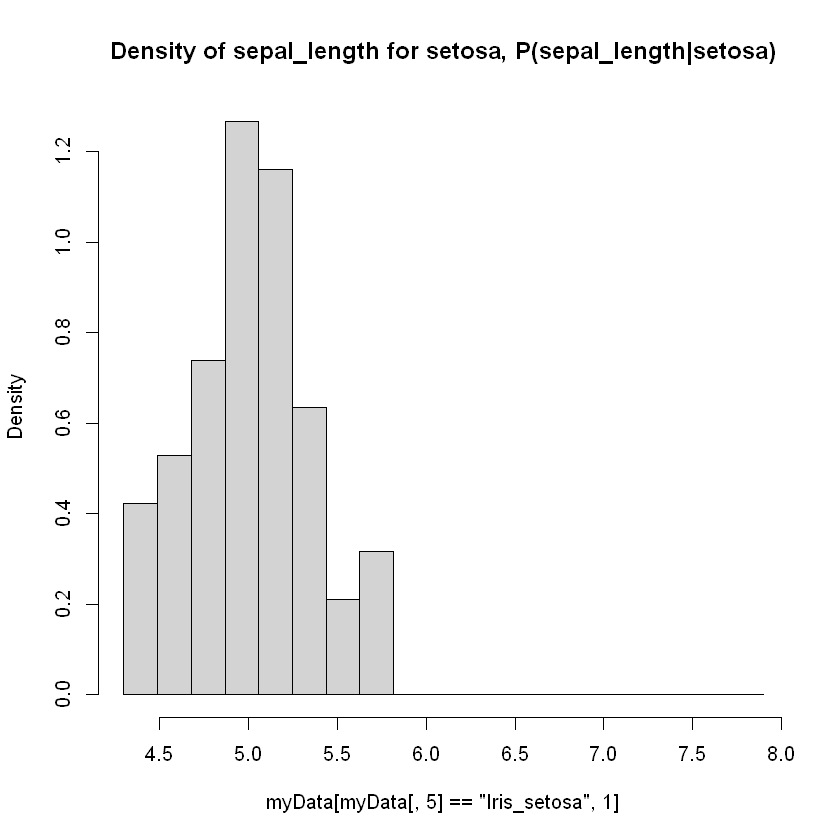

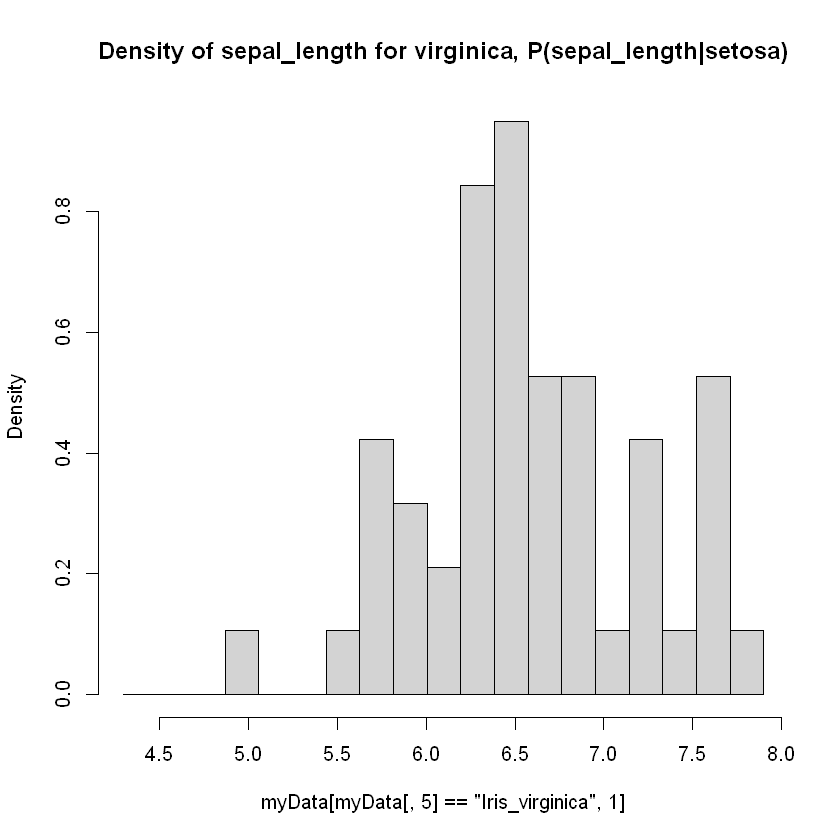

In [124]:
hist(myData[ myData[,5]=="Iris_setosa",1],main="Density of sepal_length for setosa, P(sepal_length|setosa)", breaks=breaks,freq=FALSE)
hist(myData[ myData[,5]=="Iris_virginica",1], main="Density of sepal_length for virginica, P(sepal_length|setosa)", breaks = breaks, freq=FALSE)

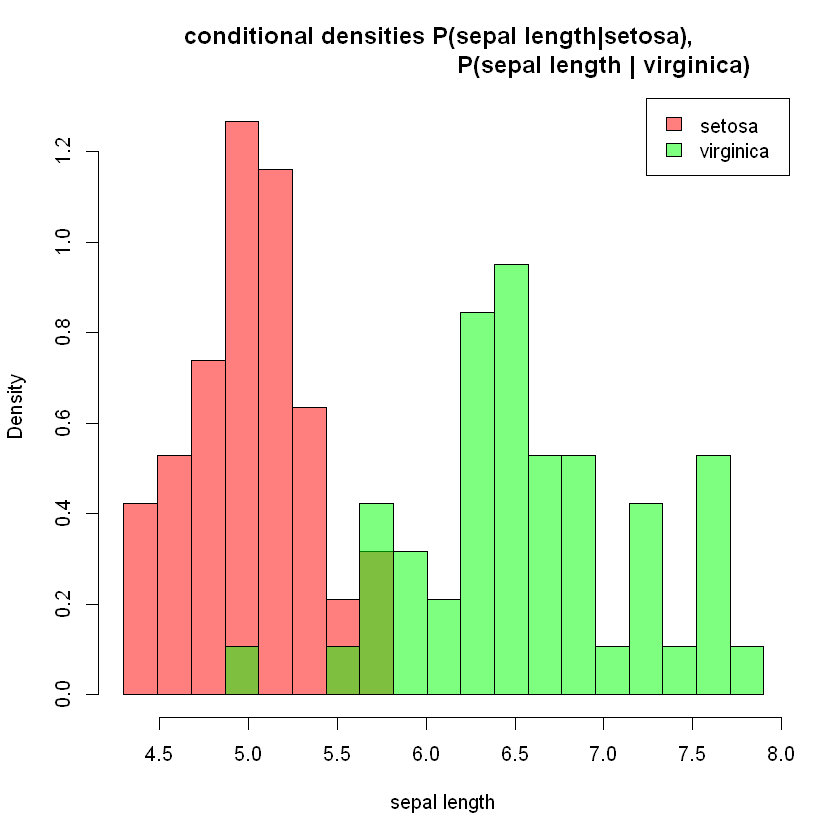

In [31]:
#If you want to plot them in a single graph you can do as follows:
hist(myData[ myData[,5]=="Iris_setosa"  , 1], breaks=breaks, 
                                              col=rgb(red=1, green=0, blue=0, alpha=0.5), 
                                              xlab="sepal length", 
                                              main="conditional densities P(sepal length|setosa), 
                                              P(sepal length | virginica)", freq=FALSE )

hist(myData[ myData[,5]=="Iris_virginica"  , 1], breaks=breaks, 
                                              col=rgb(red=0, green=1, blue=0, alpha=0.5),
                                             freq=FALSE, add=TRUE)

# Add a legend
legend("topright", legend = c("setosa", "virginica"), fill = c(rgb(red=1, green=0, blue=0, alpha=0.5), 
                                                               rgb(red=0, green=1, blue=0, alpha=0.5)))



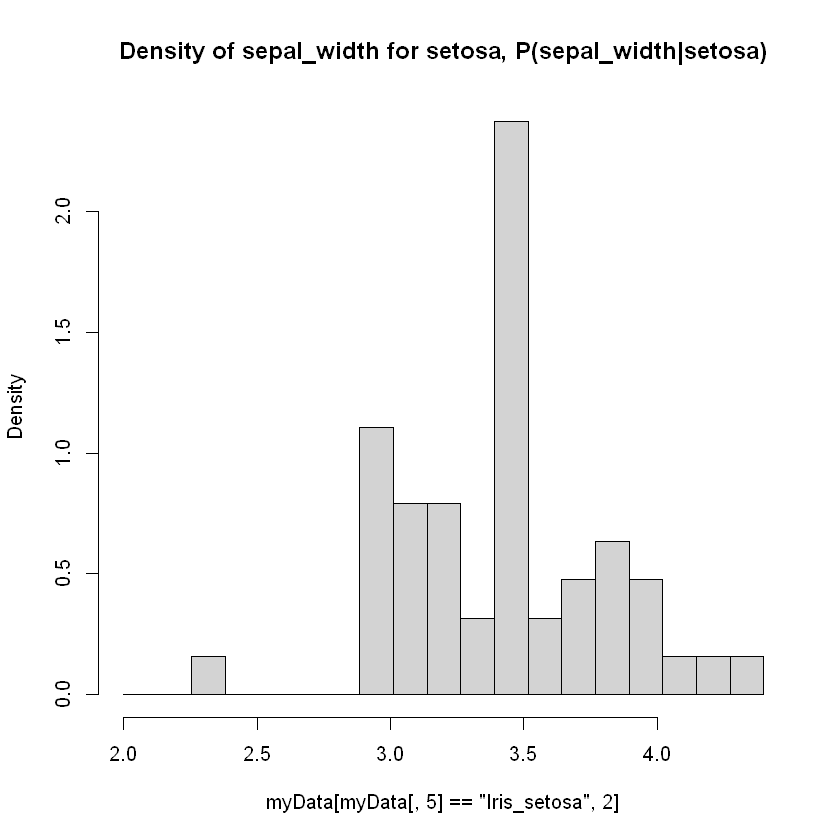

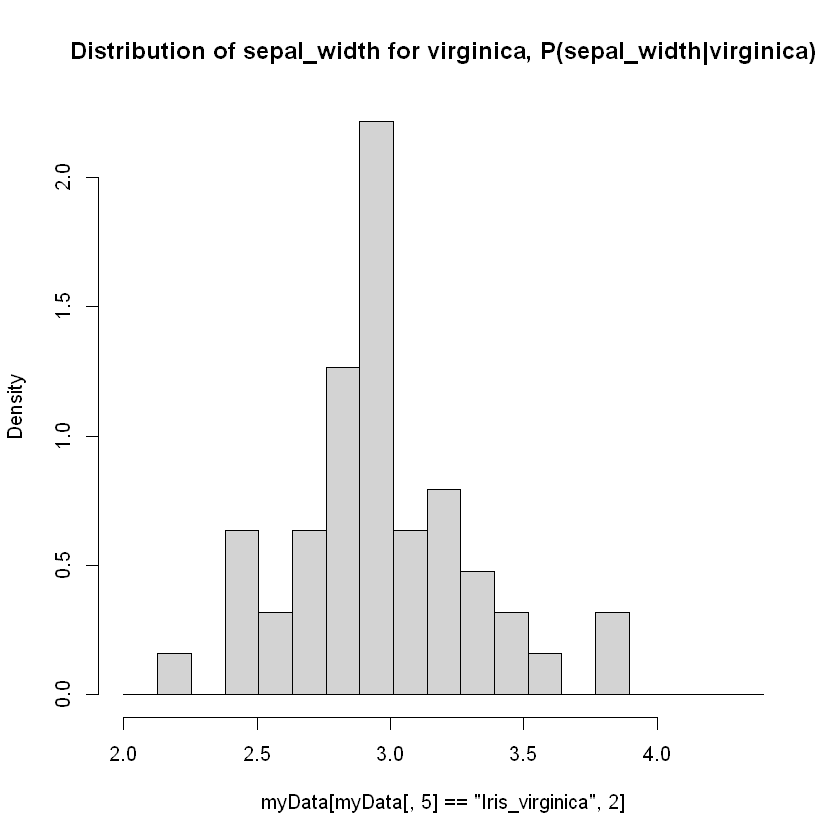

In [32]:
#first attribute: sepal width
# P(sepal_width|setosa) & P(sepal_width|virginica)

minX <- min(myData[,2])
maxX <- max(myData[,2])

breaks = seq(from = minX, to = maxX, length.out=20)

hist(myData[ myData[,5]=="Iris_setosa"  ,    2], main="Density of sepal_width for setosa, P(sepal_width|setosa)", breaks=breaks, freq=FALSE)
hist(myData[ myData[,5]=="Iris_virginica"  ,  2], main="Distribution of sepal_width for virginica, P(sepal_width|virginica)", breaks=breaks, freq=FALSE)

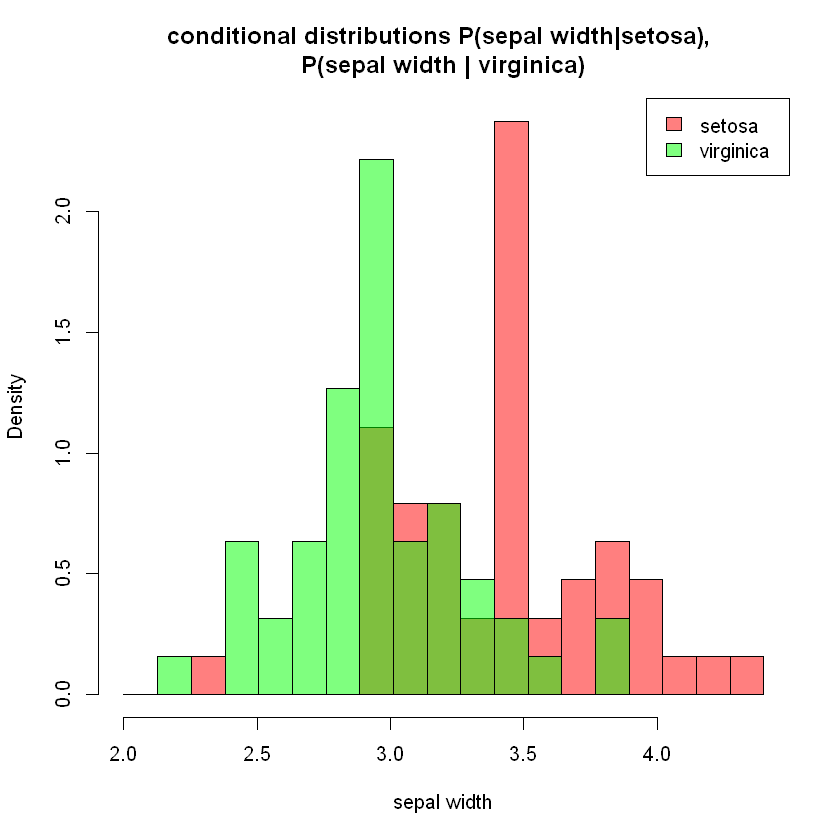

In [33]:
#If you want to plot them in a single graph you can do as follows:
hist(myData[ myData[,5]=="Iris_setosa"  , 2], breaks=breaks, 
                                              col=rgb(red=1, green=0, blue=0, alpha=0.5), 
                                              xlab="sepal width", 
                                              main="conditional distributions P(sepal width|setosa), 
P(sepal width | virginica)", freq=FALSE )
hist(myData[ myData[,5]=="Iris_virginica"  , 2], breaks=breaks, 
                                                 col=rgb(red=0, green=1, blue=0, alpha=0.5),add=TRUE, freq=FALSE)

# Add a legend
legend("topright", legend = c("setosa", "virginica"), fill = c(rgb(red=1, green=0, blue=0, alpha=0.5), 
                                                               rgb(red=0, green=1, blue=0, alpha=0.5)))



so between the two attributes, sepal_width and sepal_length, which one helps us most in determining the target variable? sepal_length because here we have the least overlap between the two distributions P(sepal_length|iris_setosa) and P(sepal_length | iris_virginica). Take as an exercise the visualisation of the other two attributes and decide which one is the best by visually inspecting the histograms.

**Exercise**: Visualise the conditional densities of the two attributes with which we have not worked and decide  which one of the four is the best by visually inspecting the histograms.

In [34]:
#your code here

## Quantifying the importance of the quantitative attributes. 

The visual inspection is useful, but ideally we would like to put a number on the importance of the different quantitative attributes. By importance we mean how useful they are in separating the different classes, in the case of iris the types of flowers. 

So how can we quantify the fact that we want the two distributions to be as far as possible and with the smallest overlap? Lets consider the following, artificially generated, setting in which we have two datasets, with a single attribute each one and two classes each. 

* **Dataset 1**: $P(z|class 1) = N(\mu=1000, \sigma=5000)$, $P(z|class 2) = N(\mu=10000, \sigma=5000)$
* **Dataset 2**: $P(z|class 1) = N(\mu=1, \sigma=0.1)$, $P(z|class 2) = N(\mu=2, \sigma=0.1)$

**Question**: Before visualising the data, for which of the two problems it is easier to separate the classes?

(you can find the code that generated the figures in the section: "Quantifying the attribute importance (code)" bellow)


<img src="QuantClassOverlap.png" alt="" width="400" height="300">

<img src="QuantNoClassOverlap.png" alt="" width="400" height="300">


Intuitevely we want to have a very large distance of the two class conditional means with a very small variance. 
So what we are going to compute is $$\frac{|\mu_{attribute|virginica} - \mu_{attribute|setosa}|}{\sigma_{attribute}}$$ for all attributes and the one that has the largest value is the attribute that best separates the two classes. 

So going back to Iris, how can we get this class conditional mean  $\mu_{attribute|virginica}$ for all attributes in one go? We will still look at two classes only to make our life simpler (virginica and setosa)

In [35]:
condMeansVrg<-colMeans(myData[myData[,5]=="Iris_virginica",1:4])

In [36]:
condMeansSts<-colMeans(myData[myData[,5]=="Iris_setosa",1:4])

In [37]:
abs(condMeansVrg-condMeansSts)

sepal_length  sepal_width petal_length  petal_width 
       1.582        0.444        4.088        1.782

but just the difference of the means is not enough, as we said we need to normalise (i.e. divide) with the standard deviation

In [38]:
sqrt(diag(var(myData[,1:4])))

sepal_length  sepal_width petal_length  petal_width 
   0.8280661    0.4335943    1.7644204    0.7631607

In [39]:
#evaluating the quantitative attribute importance for separating the different classes
#this is something that you also have to do in the project. 
attributesScore<-abs(condMeansVrg-condMeansSts)/sqrt(diag(var(myData[,1:4])))
print(attributesScore)

sepal_length  sepal_width petal_length  petal_width 
    1.910475     1.023999     2.316908     2.335026 


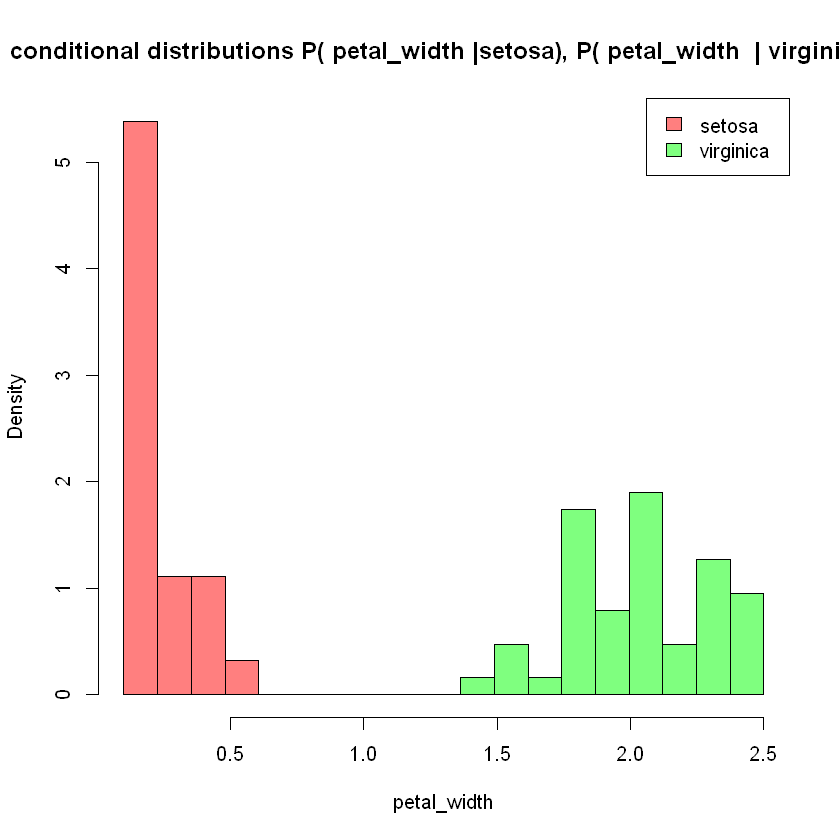

In [40]:
#visualising the conditional distribution of an attribute X given the class Y. This is also something you have 
#to do in the project.

#so the score says that the best attribute is the petal width, lets see the class conditional histograms

index<-4

minX <- min(myData[,index])
maxX <- max(myData[,index])
breaks = seq(from = minX, to = maxX, length.out=20)

attrName <- names(myData)[index]
title <- paste("conditional distributions P(",attrName,"|setosa), P(", attrName, " | virginica)")

#If you want to plot them in a single graph you can do as follows:
hist(myData[ myData[,5]=="Iris_setosa"  , index], breaks=breaks, 
                                              col=rgb(red=1, green=0, blue=0, alpha=0.5), 
                                              xlab=attrName, 
                                              main=title, freq=FALSE )

hist(myData[ myData[,5]=="Iris_virginica"  , index], breaks=breaks, 
                                                 col=rgb(red=0, green=1, blue=0, alpha=0.5),add=TRUE, freq=FALSE)

# Add a legend
legend("topright", legend = c("setosa", "virginica"), fill = c(rgb(red=1, green=0, blue=0, alpha=0.5), 
                                                               rgb(red=0, green=1, blue=0, alpha=0.5)))



So indeed sepal_width has a very good class separation (at least between virginica and setosa). So now lets make a **scatter plot** in which we will visualise the instnaces of the two classes using the two attributes that have the highest score. Scatter plots are also very useful in visualising and understanding relations in data. 

sepal_length  sepal_width petal_length  petal_width 
    1.910475     1.023999     2.316908     2.335026 


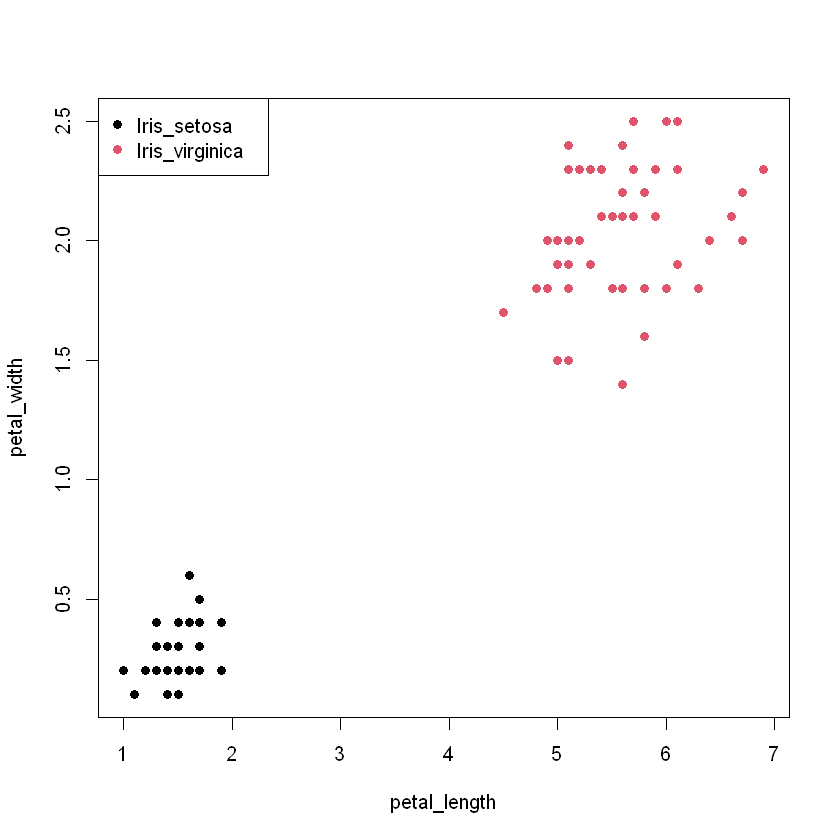

In [41]:
#so lets use the two best attributes according to the score and see whether they allow us to easily
#separate the two classes
print(attributesScore)
#col is the color of each dagta point which is taken from their class label
plot(myData[myData[,5]!="Iris_versicolor",c(3,4)],        #plot a graph with the 3rd and 4th attributes, with instances from setosa and versicolor only
                       col=factor(myData[myData[,5]!="Iris_versicolor",5]), #color instances by the class label
                       pch=19)  #use a dot as a marker

#and lets add a legend
legend("topleft",
       legend = levels(factor(myData[myData[,5]!="Iris_versicolor",5])), #one legend per class
       pch = 19,
       col = factor(levels(factor(myData[myData[,5]!="Iris_versicolor",5])))) #the color of the legend is given by the class

So lets now take a small look at functions, and make a simple one that for all attributes draws their histograms and saves each one of them in a file. 

In [42]:
#since we can do histograms only on quantitative variables we need to 
#pass the indexes of the quantitative variable. Lets define as default
#value for these indeced the ones of iris, i.e. 1,2,3,4. 
#Attention the **graphics** folder should exist, because we 
#are going to save all files there. 
visualiseAllHistograms <- function(myData, indexQuant=c(1:4)){
    for( i in indexQuant){
        hist(myData[,i], main = paste("Histogram of attribute", names(myData)[i]))
        
        #and lets save the figure in a .pdf
        dev.copy2pdf(file=paste("graphics/","HistogramOfAttribute",names(myData)[i],".pdf",sep=""))
    }
}

ERROR: Error in device(...): cannot open file 'graphics/HistogramOfAttributesepal_length.pdf'


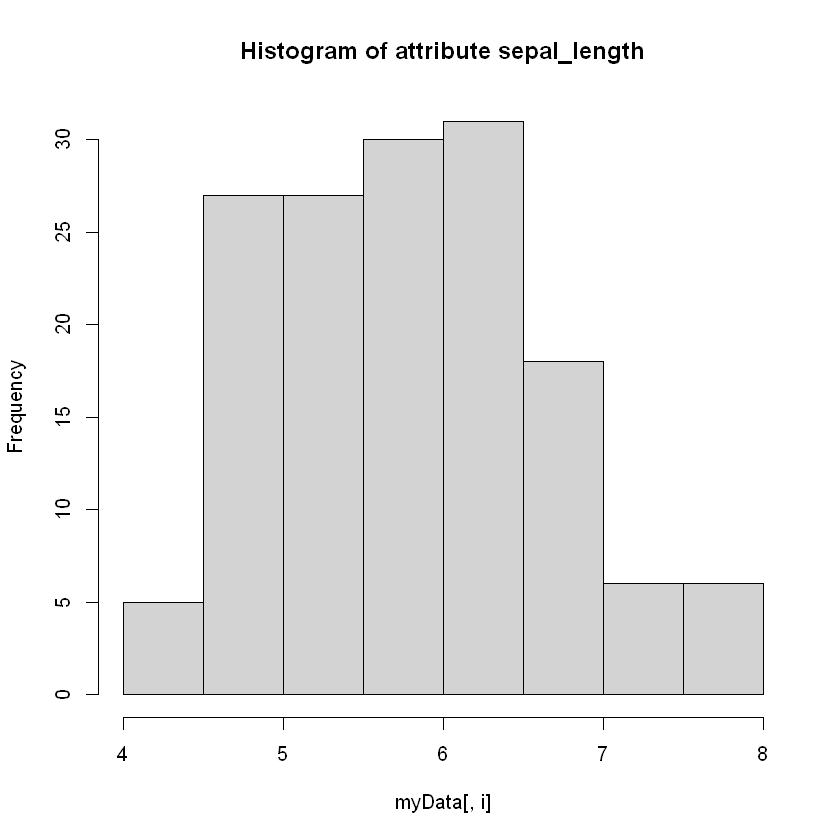

In [43]:
#no need to pass indexQuantitative since we are working with iris, and we have set a de
#default value to corresponds to iris. 
visualiseAllHistograms(myData)

## Quantifying the attribute importance (code)


Additional material: code that has been used to demonstrate the quantification of the attribute importance by working with different pairs of Gaussian distributions.

$$\frac{|\mu_{attribute|virginica} - \mu_{attribute|setosa}|}{\sigma_{attribute}}$$

with the help of two artificial datasets, one attribute and two classes for each one of them, that are generated using normal distributions.

* **Dataset 1**: $P(z|class 1) = N(\mu=1000, \sigma=5000)$, $P(z|class 2) = N(\mu=10000, \sigma=5000)$
* **Dataset 2**: $P(z|class 1) = N(\mu=1, \sigma=0.1)$, $P(z|class 2) = N(\mu=2, \sigma=0.1)$


In [ ]:
#imaginary example, two classes with the z attribute following
#a conditional distribution that is normal in each one of the two 
#classes with a different mean and a standard deviation. 
z1<-rnorm(mean= 1, sd= 0.1, n= 1000 ) 
z2<-rnorm(mean= 2, sd= 0.1, n= 1000 ) 

hist(z1, freq=FALSE, breaks=seq(from=(min(z1,z2)-1), to=((max(z1,z2)+1)), length.out=50), col=rgb(1,0,0,0.5), 
     main="Conditional distribution P(z|Class 1), P(z|Class 2)", xlab="z")

hist(z2, freq=FALSE, breaks=seq(from=(min(z1,z2)-1), to=((max(z1,z2)+1)), length.out=50), col=rgb(0,1,0,0.5), add=TRUE)

legend("topright", legend = c("Class 1", "Class 2"), fill = c(rgb(red=1, green=0, blue=0, alpha=0.5), 
                                                               rgb(red=0, green=1, blue=0, alpha=0.5)))
# Copy the current plot to a PNG file
dev.copy(png, filename = "QuantNoClassOverlap.png")
dev.off()

In [ ]:
z1<-rnorm(mean= 1000,  sd= 5000, n= 1000 ) 
z2<-rnorm(mean= 10000, sd= 5000, n= 1000 ) 

hist(z1, freq=FALSE, breaks=seq(from=(min(z1,z2)-1), to=((max(z1,z2)+1)), length.out=50), col=rgb(1,0,0,0.5),
     main="Conditional distribution P(z|Class 1), P(z|Class 2)", xlab="z")

hist(z2, freq=FALSE, breaks=seq(from=(min(z1,z2)-1), to=((max(z1,z2)+1)), length.out=50), col=rgb(0,1,0,0.5), add=TRUE)

legend("topright", legend = c("Class 1", "Class 2"), fill = c(rgb(red=1, green=0, blue=0, alpha=0.5), 
                                                               rgb(red=0, green=1, blue=0, alpha=0.5)))

# Copy the current plot to a PNG file
dev.copy(png, filename = "QuantClassOverlap.png")
dev.off()